In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr

ds = xr.open_dataset(r"/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/drought_indices/spei/SPEI_1991.nc")
print(ds)

<xarray.Dataset> Size: 7MB
Dimensions:  (time: 12, lat: 160, lon: 213)
Coordinates:
  * time     (time) datetime64[ns] 96B 1991-01-01 1991-02-01 ... 1991-12-01
  * lat      (lat) float64 1kB -35.1 -35.05 -35.0 -34.95 ... -27.25 -27.2 -27.15
  * lon      (lon) float64 2kB 113.6 113.7 113.7 113.8 ... 124.1 124.2 124.2
Data variables:
    spei_1   (time, lat, lon) float32 2MB ...
    spei_3   (time, lat, lon) float32 2MB ...
    spei_6   (time, lat, lon) float32 2MB ...
    spei_12  (time, lat, lon) float32 2MB ...


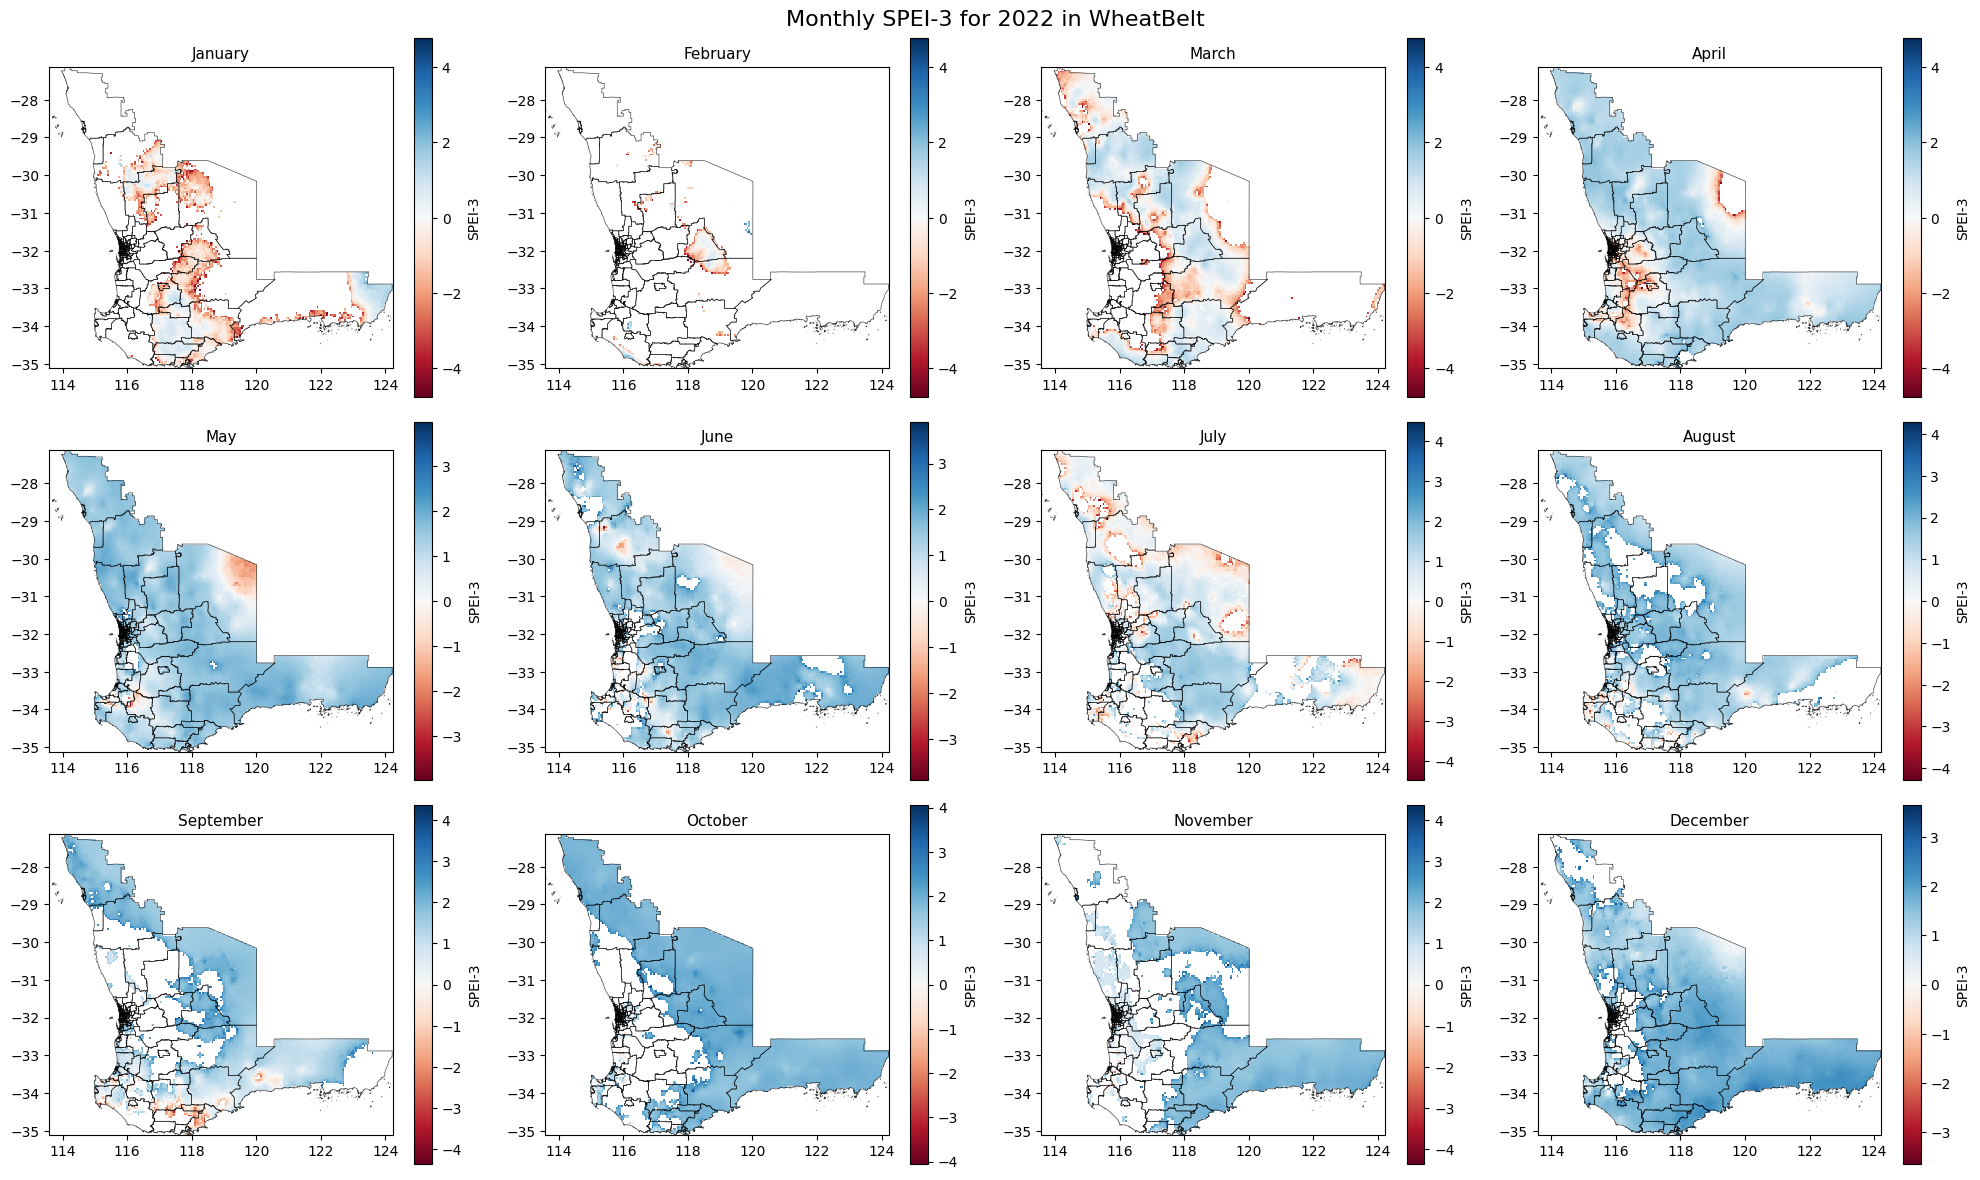

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path

# === Load the shapefile ===
shapefile_path = r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Eastern_Aus_Bunbury/Eastern_Aus_Bunbury.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the SPI dataset ===
nc_path = Path(r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/drought_indices/SPEI/SPEI_2022.nc')
year = nc_path.stem.split('_')[1]

ds = xr.open_dataset(nc_path)

# === Select SPI variable ONCE ===
var_name = 'spei_3'          # change here: spi_3, spi_6, etc.
monthly_rain = ds[var_name]

# === Convert variable name to display label ===
spi_label = var_name.replace('_', '-').upper()   # spi_1 → SPI-1

# === Fix metadata so colorbar label is correct ===
monthly_rain.attrs.pop('units', None)
monthly_rain.attrs['long_name'] = spi_label

# === Create figure and axes ===
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# === Plot each month ===
for i, month in enumerate(monthly_rain.time):
    ax = axes[i]
    data = monthly_rain.sel(time=month)

    data.plot(
        ax=ax,
        cmap='RdBu',
        add_colorbar=True
    )

    # Overlay region boundaries
    qld_shape.boundary.plot(
        ax=ax,
        color='black',
        linewidth=0.5,
        alpha=0.7
    )

    # Titles and formatting
    ax.set_title(month.dt.strftime('%B').item(), fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove unused subplots ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === Figure title (automatic) ===
plt.suptitle(
    f'Monthly {spi_label} for {year} in WheatBelt',
    fontsize=16,
    y=0.98
)

plt.tight_layout()
plt.show()


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path

# === Paths ===
data_dir = Path(r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/drought_indices/spei')
output_dir = Path(r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Paper/Figures/Drought/SPEI')
output_dir.mkdir(parents=True, exist_ok=True)

shapefile_path = r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Eastern_Aus_Bunbury/Eastern_Aus_Bunbury.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Years and SPI variables ===
years = range(1991, 2024)
spi_vars = ['spei_1', 'spei_3', 'spei_6', 'spei_12']

# === Loop over years ===
for year in years:
    nc_path = data_dir / f'SPEI_{year}.nc'

    if not nc_path.exists():
        print(f"Missing file: {nc_path}")
        continue

    ds = xr.open_dataset(nc_path)

    # === Loop over SPI scales ===
    for var_name in spi_vars:

        if var_name not in ds:
            print(f"{var_name} not found in {nc_path.name}")
            continue

        monthly_rain = ds[var_name]

        # === Create display label ===
        spi_label = var_name.replace('_', '-').upper()   # spi_1 → SPI-1
        file_label = spi_label.replace('-', '')          # SPI-1 → SPI1

        # === Fix metadata ===
        monthly_rain.attrs.pop('units', None)
        monthly_rain.attrs['long_name'] = spi_label

        # === Create figure ===
        fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
        axes = axes.flatten()

        # === Plot each month ===
        for i, month in enumerate(monthly_rain.time):
            ax = axes[i]
            data = monthly_rain.sel(time=month)

            data.plot(
                ax=ax,
                cmap='RdBu',
                add_colorbar=True
            )

            qld_shape.boundary.plot(
                ax=ax,
                color='black',
                linewidth=0.5,
                alpha=0.7
            )

            ax.set_title(month.dt.strftime('%B').item(), fontsize=11)
            ax.set_xlabel('')
            ax.set_ylabel('')

        # === Remove unused subplots ===
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # === Suptitle ===
        plt.suptitle(
            f'Monthly {spi_label} for {year} in WheatBelt',
            fontsize=16,
            y=0.98
        )

        plt.tight_layout()

        # === Save figure ===
        output_file = output_dir / f'{file_label}_{year}.png'
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        plt.close()

        print(f"Saved: {output_file.name}")

    ds.close()


Saved: SPEI1_1991.png
Saved: SPEI3_1991.png
Saved: SPEI6_1991.png
Saved: SPEI12_1991.png
Saved: SPEI1_1992.png
Saved: SPEI3_1992.png
Saved: SPEI6_1992.png
Saved: SPEI12_1992.png
Saved: SPEI1_1993.png
Saved: SPEI3_1993.png
Saved: SPEI6_1993.png
Saved: SPEI12_1993.png
Saved: SPEI1_1994.png
Saved: SPEI3_1994.png
Saved: SPEI6_1994.png
Saved: SPEI12_1994.png
Saved: SPEI1_1995.png
Saved: SPEI3_1995.png
Saved: SPEI6_1995.png
Saved: SPEI12_1995.png
Saved: SPEI1_1996.png
Saved: SPEI3_1996.png
Saved: SPEI6_1996.png
Saved: SPEI12_1996.png
Saved: SPEI1_1997.png
Saved: SPEI3_1997.png
Saved: SPEI6_1997.png
Saved: SPEI12_1997.png
Saved: SPEI1_1998.png
Saved: SPEI3_1998.png
Saved: SPEI6_1998.png
Saved: SPEI12_1998.png
Saved: SPEI1_1999.png
Saved: SPEI3_1999.png
Saved: SPEI6_1999.png
Saved: SPEI12_1999.png
Saved: SPEI1_2000.png
Saved: SPEI3_2000.png
Saved: SPEI6_2000.png
Saved: SPEI12_2000.png
Saved: SPEI1_2001.png
Saved: SPEI3_2001.png
Saved: SPEI6_2001.png
Saved: SPEI12_2001.png
Saved: SPEI1_2002.png

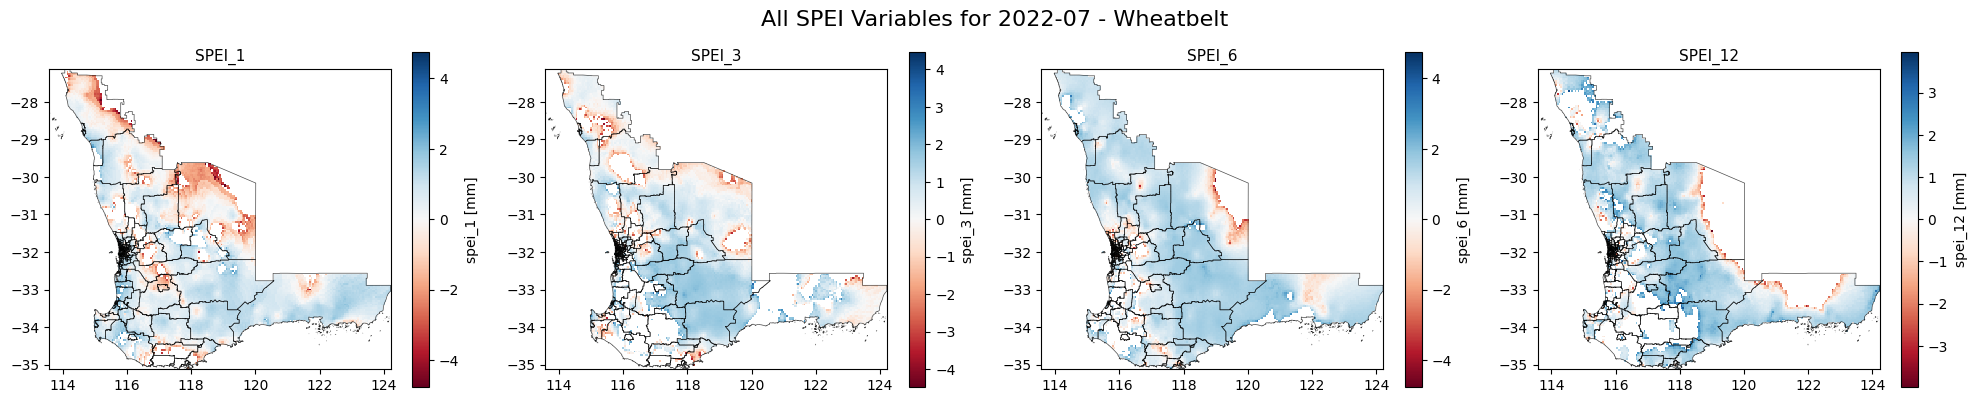

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path
import math

# === Load shapefile ===
shapefile_path = r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Eastern_Aus_Bunbury/Eastern_Aus_Bunbury.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Load NetCDF ===
nc_path = Path(r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/drought_indices/SPEI/SPEI_2022.nc')
year = nc_path.stem.split('_')[1]

ds = xr.open_dataset(nc_path)

# === Select ONE month here ===
selected_month = "2022-07-01"   # Change this to any available month
data_month = ds.sel(time=selected_month)

# === Get all variables ===
variables = list(ds.data_vars)
n_vars = len(variables)

# === Create subplot grid dynamically ===
ncols = 4
nrows = math.ceil(n_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4 * nrows))
axes = axes.flatten()

# === Plot each variable ===
for i, var in enumerate(variables):
    ax = axes[i]
    data = data_month[var]

    data.plot(
        ax=ax,
        cmap='RdBu',      # drought standard
        # vmin=-2,            # fixed scale
        # vmax=2,
        add_colorbar=True
    )

    # Overlay boundary
    qld_shape.boundary.plot(
        ax=ax,
        color='black',
        linewidth=0.5,
        alpha=0.7
    )

    ax.set_title(var.upper(), fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove empty subplots ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === Main title ===
plt.suptitle(
    f'All SPEI Variables for {selected_month[:7]} - Wheatbelt',
    fontsize=16,
    y=0.98
)

plt.tight_layout()
plt.show()


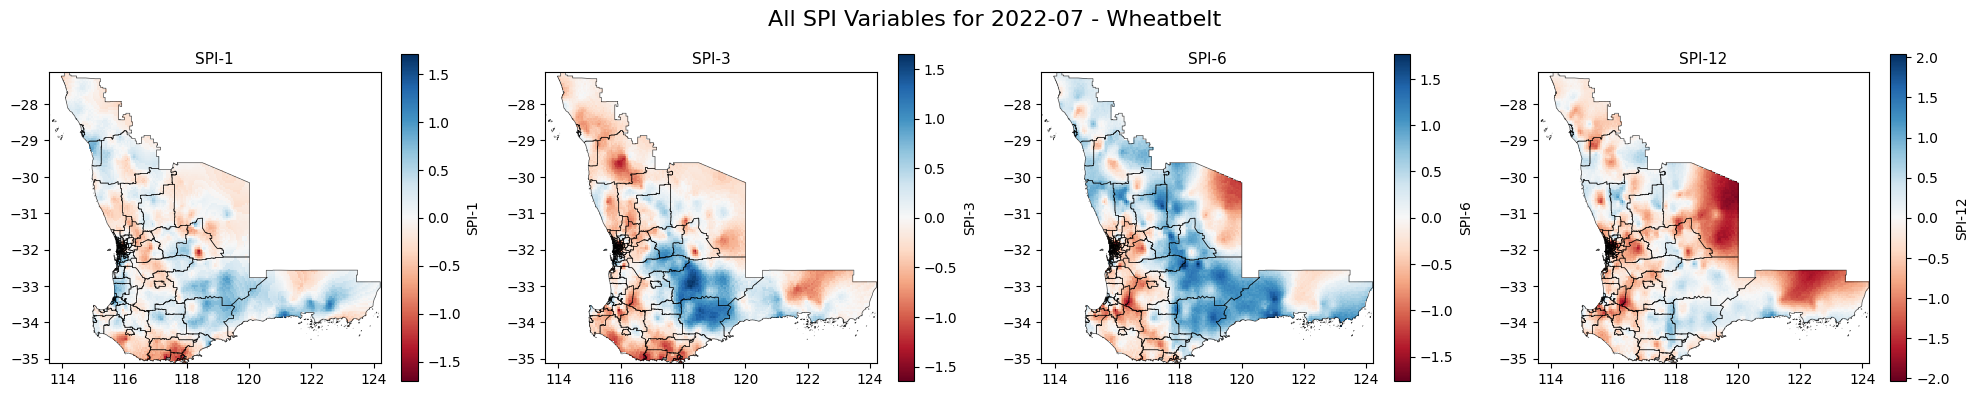

In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path
import math

# === Load shapefile ===
shapefile_path = r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Eastern_Aus_Bunbury/Eastern_Aus_Bunbury.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Load NetCDF ===
nc_path = Path(r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/drought_indices/SPI/SPI_2022.nc')
year = nc_path.stem.split('_')[1]

ds = xr.open_dataset(nc_path)

# === Select ONE month ===
selected_month = "2022-07-01"   # Change this as needed
data_month = ds.sel(time=selected_month)

# === Get all SPI variables ===
variables = list(ds.data_vars)
n_vars = len(variables)

# === Dynamic subplot grid ===
ncols = 4
nrows = math.ceil(n_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4 * nrows))
axes = axes.flatten()

# === Plot each SPI variable ===
for i, var in enumerate(variables):
    ax = axes[i]

    # Copy variable for metadata editing
    data = data_month[var].copy()

    # Remove units so they don't override label
    data.attrs.pop('units', None)

    # Set colorbar label = variable name (SPI-1 style)
    data.attrs['long_name'] = var.replace('_', '-').upper()

    # Plot
    data.plot(
        ax=ax,
        cmap='RdBu',   # Proper drought colormap
        # vmin=-2,         # Fixed comparison scale
        # vmax=2,
        add_colorbar=True
    )

    # Overlay boundary
    qld_shape.boundary.plot(
        ax=ax,
        color='black',
        linewidth=0.5,
        alpha=0.7
    )

    ax.set_title(var.replace('_', '-').upper(), fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove unused subplots ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === Main title ===
plt.suptitle(
    f'All SPI Variables for {selected_month[:7]} - Wheatbelt',
    fontsize=16,
    y=0.98
)

plt.tight_layout()
plt.show()
